# In class Project #3 Building Functions and Visualizing Distribution

In this weeks project, I will walk you through building functions. We will reconstruct the functions from Chapter 3. All functions will be arranged in a single block of code.

In this lesson you will use:
* Statistical functions that we created in chapter 3

You will learn to:
* Import financial data from Yahoo Finance using pandas_dataread
* Calculate the daily percent change of each stocks value (from close to close)
* Create a single datframe holding the summary statistics of each variable in a dataframe
* Plot the observed data and the transformed data to observe changes over time
* Create distribtuions for data from each stock downloaded
* Include summary statistics with each plot
* Plot the distributions in a single figure for comparison

### Building your own statistical functions

Functions are a core element of computing. They allow you to resuse could without excessive copying and pasting. Suppose, for example, that you build a program that is 100 lines of codes. If you want to reuse this program, packaging it as a function will allow you to reuse the code by simply calling the function in a single line.

As you move through your education and your career, it will be helpful for you to understand how to construct statistical functions. An easy way to get started is to build functions for statistics that provide information about the distribution of data. Below we will rebuild the functions form Chapter 3. We will plot data using scatter plots and bar graphs, attempting to tease out the meaning of variance, covariance, correlation, skewness, and heteroskedasticity.

In [1]:
lst1 = [1, 2, 3, 4, 5]
lst2 = [i * 2 for i in range(1,6)]
lst3 = [4, 4, 5, 6, 7, 6, 5, 4]

total = 0
for val in lst1:
    total = total + val
    print("val:", val, "total:", total)
    
print("total of calues from lst1:", total)
print("lst2:", lst2)

total = 0
for val in lst2:
    total = total + val
    print("val:", val, "total:", total)
print("total of values from lst2:", total)

val: 1 total: 1
val: 2 total: 3
val: 3 total: 6
val: 4 total: 10
val: 5 total: 15
total of calues from lst1: 15
lst2: [2, 4, 6, 8, 10]
val: 2 total: 2
val: 4 total: 6
val: 6 total: 12
val: 8 total: 20
val: 10 total: 30
total of values from lst2: 30


Building a function that allows us to reuse the code without rebuilding

In [2]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    # for i in range(n):
    #      val =list_obj(i)
    #      total += val
    for i in range(n):
        total += list_obj[i]
    # return outputs whatever value or variables is after return
    return total

print("total of lst1:", total(lst1))
print("total of lst2:", total(lst2))


def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_ 

mean1 = mean(lst1)
mean2 = mean(lst2)
print("mean of lst1:", mean1)
print("mean of lst2:", mean2)


def median(list_obj):
    n = len(list_obj)
    # order list by value from smallest to greatest
    list_obj = sorted(list_obj)
    # lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # take the average of the two middle numbers
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1]) 
    return median_

median1 = median(lst1)
median2 = median(lst2)
print("median lst1:", median1)
print("median lst2:", median2)


def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

mode1 = mode(lst1)
mode2 = mode(lst2)
mode3 = mode(lst3)
print("mode of lst1:", mode1)
print("mode of lst2:", mode2)
print("mode of lst3:", mode3)


def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    return variance_

variance1 = variance(lst1)
variance2 = variance(lst2)
variance3 = variance(lst3)
print("variance for lst1:", variance1)
print("variance for lst2:", variance2)
print("variance for lst3:", variance3)


def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

SD1 = SD(lst1)
SD2 = SD(lst2)
SD3 = SD(lst3)
print("SD for lst1:", SD1)
print("SD for lst2:", SD2)
print("SD for lst3:", SD3)


def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
        
covariance1 = covariance(lst1, lst2)
covariance2 = covariance(lst1, lst3)
print("covariance of lst1:", covariance1)
print("covariance of lst2:", covariance2)

population_cov = covariance(lst1, lst2)
print("population_cov:", population_cov)
sample_cov = covariance(lst1, lst2, sample = True)
print("sample_cov:", sample_cov)


def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    # Insert variables into formula
    corr = cov / (SD1 * SD2)
    return corr

correlation1 = correlation(lst1, lst2)
print("correlation of lst 1 & 2:", correlation1)

# look at chapter #3, find the equations
def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    # insert variables into formula
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
    return skew

population_skew_lst1 = skewness(lst1, sample = False)
population_skew_lst2 = skewness(lst2, sample = False)
print("population_skew_lst1:", population_skew_lst1)
print("population_skew_lst2:", population_skew_lst2)
sample_skew_lst1 = skewness(lst1, sample = True)
sample_skew_lst2 = skewness(lst2, sample = True)
print("sample_skew_lst1:", sample_skew_lst1)
print("sample_skew_lst2:", sample_skew_lst2)


def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    return kurt

population_kurt_lst1 = kurtosis(lst1)
population_kurt_lst2 = kurtosis(lst2)
print("population_kurt_lst1:", population_kurt_lst1)
print("population_kurt_lst2:", population_kurt_lst2)
sample_kurt_lst1 = kurtosis(lst1, sample = True)  
sample_kurt_lst2 = kurtosis(lst2, sample = True)  
print("sample_kurt_lst1:", sample_kurt_lst1)  
print("sample_kurt_lst2:", sample_kurt_lst2)

total of lst1: 15
total of lst2: 30
mean of lst1: 3.0
mean of lst2: 6.0
median lst1: 3
median lst2: 6
mode of lst1: [1, 2, 3, 4, 5]
mode of lst2: [2, 4, 6, 8, 10]
mode of lst3: [4]
variance for lst1: 2.0
variance for lst2: 8.0
variance for lst3: 1.109375
SD for lst1: 1.4142135623730951
SD for lst2: 2.8284271247461903
SD for lst3: 1.0532687216470449
List lengths are not equal
List1: 5
List2: 8
covariance of lst1: 4.0
covariance of lst2: None
population_cov: 4.0
sample_cov: 5.0
correlation of lst 1 & 2: 0.9999999999999998
population_skew_lst1: 1.63584
population_skew_lst2: 13.08672
sample_skew_lst1: 0.6386417642394556
sample_skew_lst2: 0.6332366997081644
population_kurt_lst1: 1.6999999999999997
population_kurt_lst2: 1.6999999999999997
sample_kurt_lst1: 5.599999999999994
sample_kurt_lst2: 5.599999999999994


Now let's create a function that gathers statistics for each variable in a dataframe.

In [3]:
# this is gathering all the statistics and putting them in a dictionary 
# df is dataframe
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

For the next exercise, you will need to install pandas_datareader using:

* pip install pandas-datareader

^ use this one above for my device

If you are not an administrator, you may use the command

* pip install pandas-datareader --user

Now that we have built our statistical functions, we will import daily stock data using pandas_datareader. Let's import some of the major tech stocks.

In [4]:
import pandas as pd
import pandas_datareader.data as web
import datetime
# How far back of data do you want to pull
start = datetime.datetime(2012, 1 , 1)
# When to pull data to "today" 
end = datetime.datetime.today()

# an empty dictionary
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TREX"]
for key in stocks:
    # web.data rader (Stockname, source, start_date, end_date)
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

Now save the closing price data for all four stocks in a single dataframe.

In [5]:
# how to print data for one company
data_dict["MSFT"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...
2020-09-18,203.649994,196.250000,202.800003,200.389999,55225300.0,200.389999
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,202.539993
2020-09-22,208.100006,202.080002,205.059998,207.419998,33517100.0,207.419998


In [6]:
# this is a list of closed prices for the list companies
# it is a summary of all the companies
# axis = 1 compacts the list horizontally 
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,MSFT,AAPL,FB,TREX
Date,,,,
2012-01-03,26.770000,14.686786,NaN,2.882500
2012-01-04,27.400000,14.765715,NaN,2.903750
2012-01-05,27.680000,14.929643,NaN,2.923750
2012-01-06,28.110001,15.085714,NaN,2.887500
2012-01-09,27.740000,15.061786,NaN,2.878750
...,...,...,...,...
2020-09-18,200.389999,106.839996,252.529999,66.379997
2020-09-21,202.539993,110.080002,248.149994,66.360001
2020-09-22,207.419998,111.809998,254.750000,68.239998


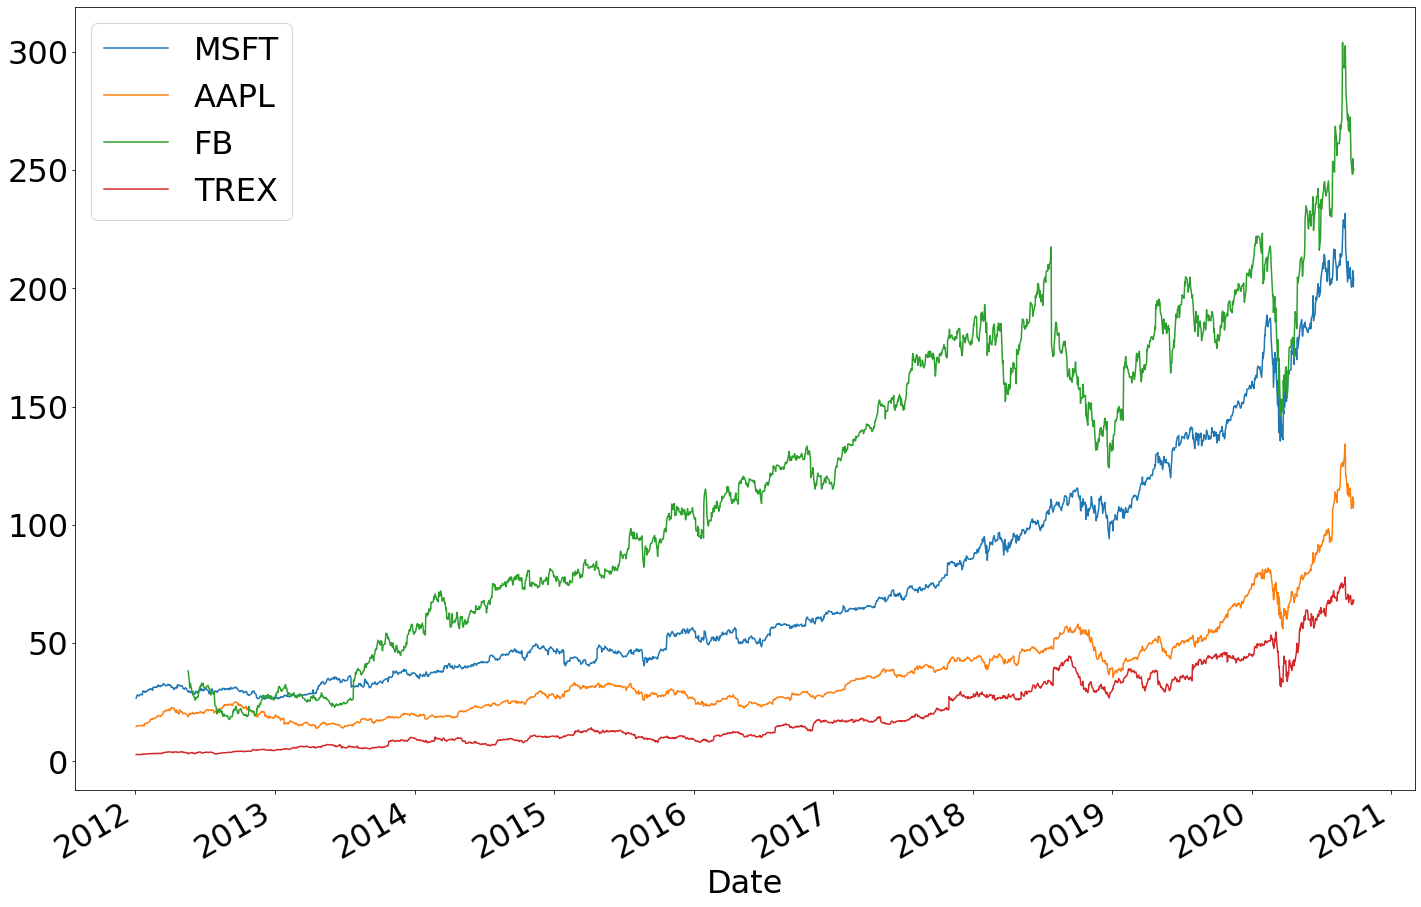

In [7]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
# create a new figure to use for plotting
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

You may want to observe ttge rate of cgange of prices rather then level.

For time series data, it is a good idea to use rates rather then levels when calculating statistics.

Timw series data usually includes autocorrelation, whcih means today's value is thought to be based off of yesterdays value plus or minus some change. 

In [8]:
# pct_change give percent as decimal. 
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TREX
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537415,NaN,0.737208
2012-01-05,1.021900,1.110194,NaN,0.688764
2012-01-06,1.553469,1.045381,NaN,-1.239842
2012-01-09,-1.316261,-0.158618,NaN,-0.303029
...,...,...,...,...
2020-09-18,-1.241932,-3.172014,-0.898677,-2.939029
2020-09-21,1.072905,3.032577,-1.734449,-0.030125
2020-09-22,2.409403,1.571580,2.659684,2.833028


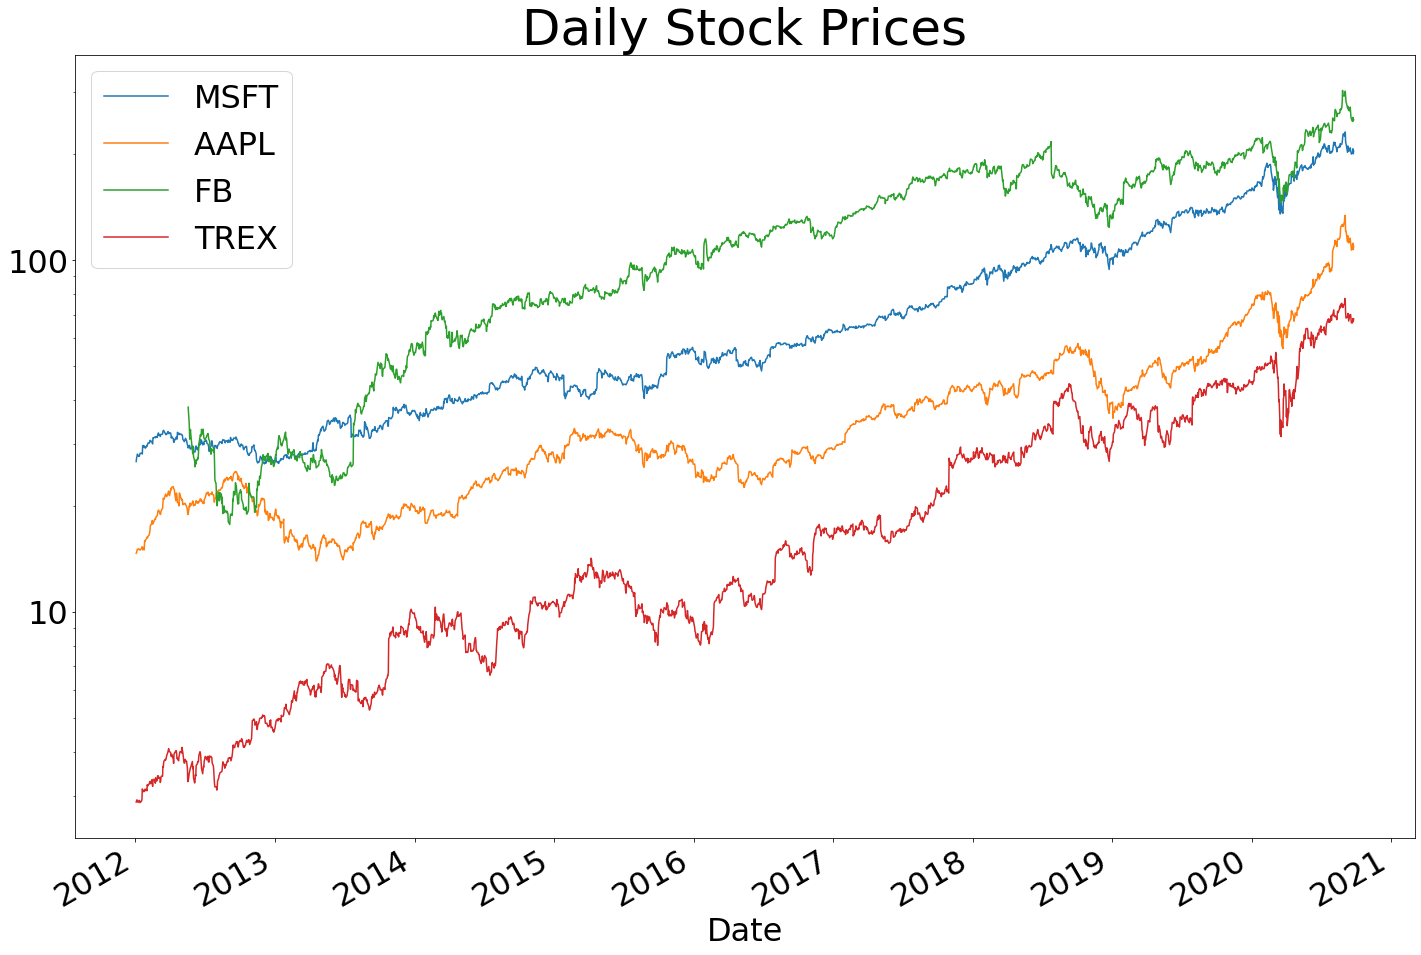

In [9]:
import matplotlib.pyplot as plt
# set default font size
plt.rcParams.update({'font.size': 32})
# create a new figure to use for plotting
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")
# reset y labels to integer from scientific notation
# ax.get_ysticks() generates a list of the axis values for the y axis
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    


# the title or chart
plt.title("Daily Stock Prices", fontsize = 50)
# show visualization
plt.show()
# remove fig, ax by closing
plt.close()

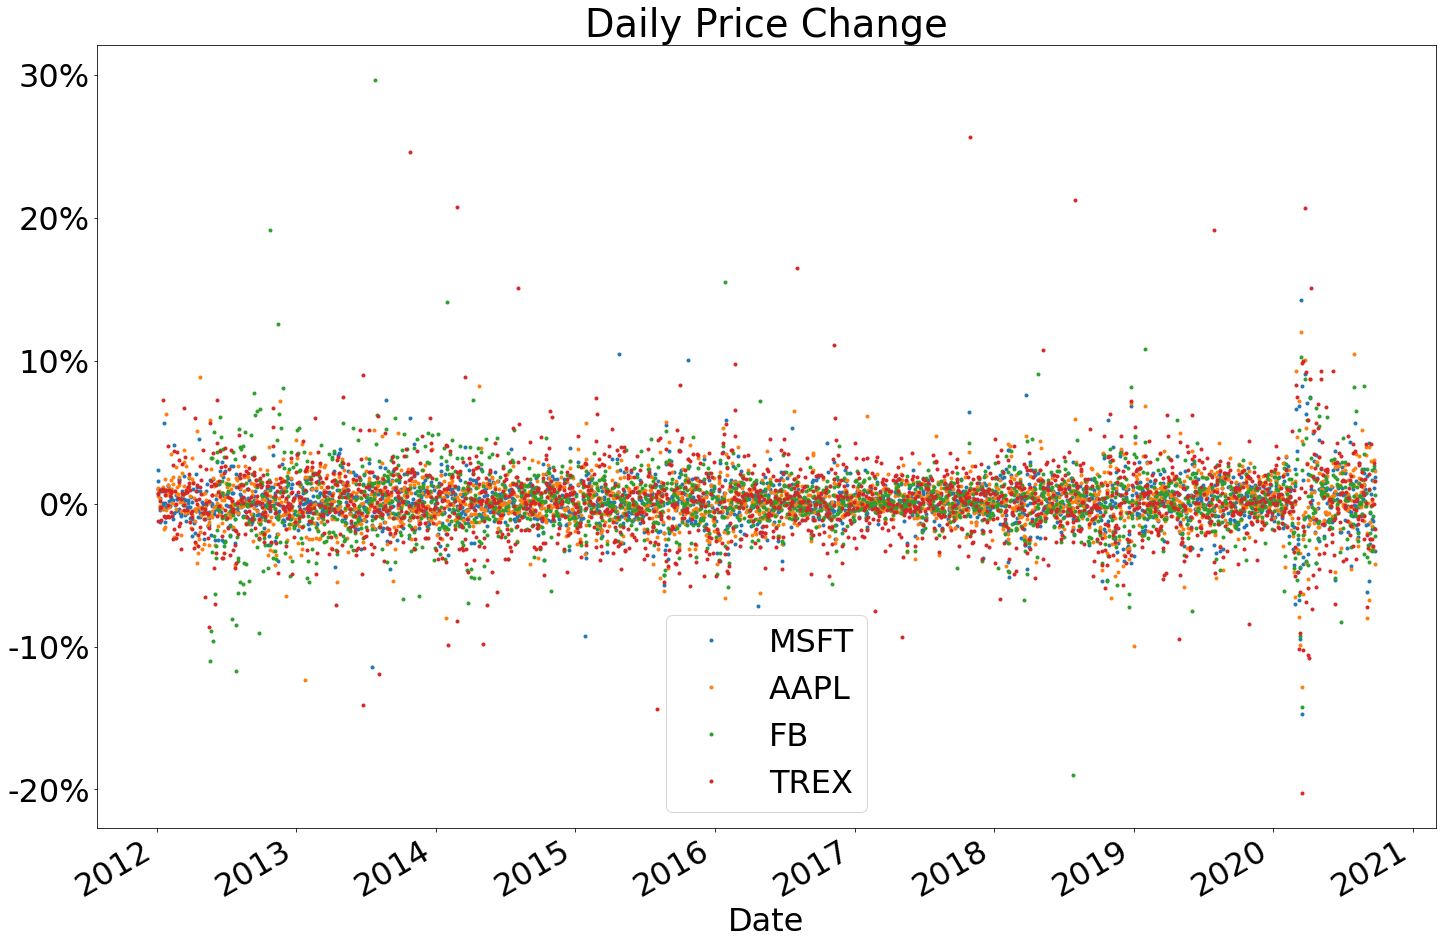

In [10]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [11]:
stats_df = gather_statistics(price_change_data)
stats_df

,MSFT,AAPL,FB,TREX
mean,0.106,0.108,0.117,0.182
median,0.069,0.087,0.107,0.159
variance,2.674,3.230,5.559,7.784
S.D.,1.635,1.797,2.358,2.790
skewness,0.003,0.005,0.000,0.001
kurtosis,14.219,10.028,22.314,17.308


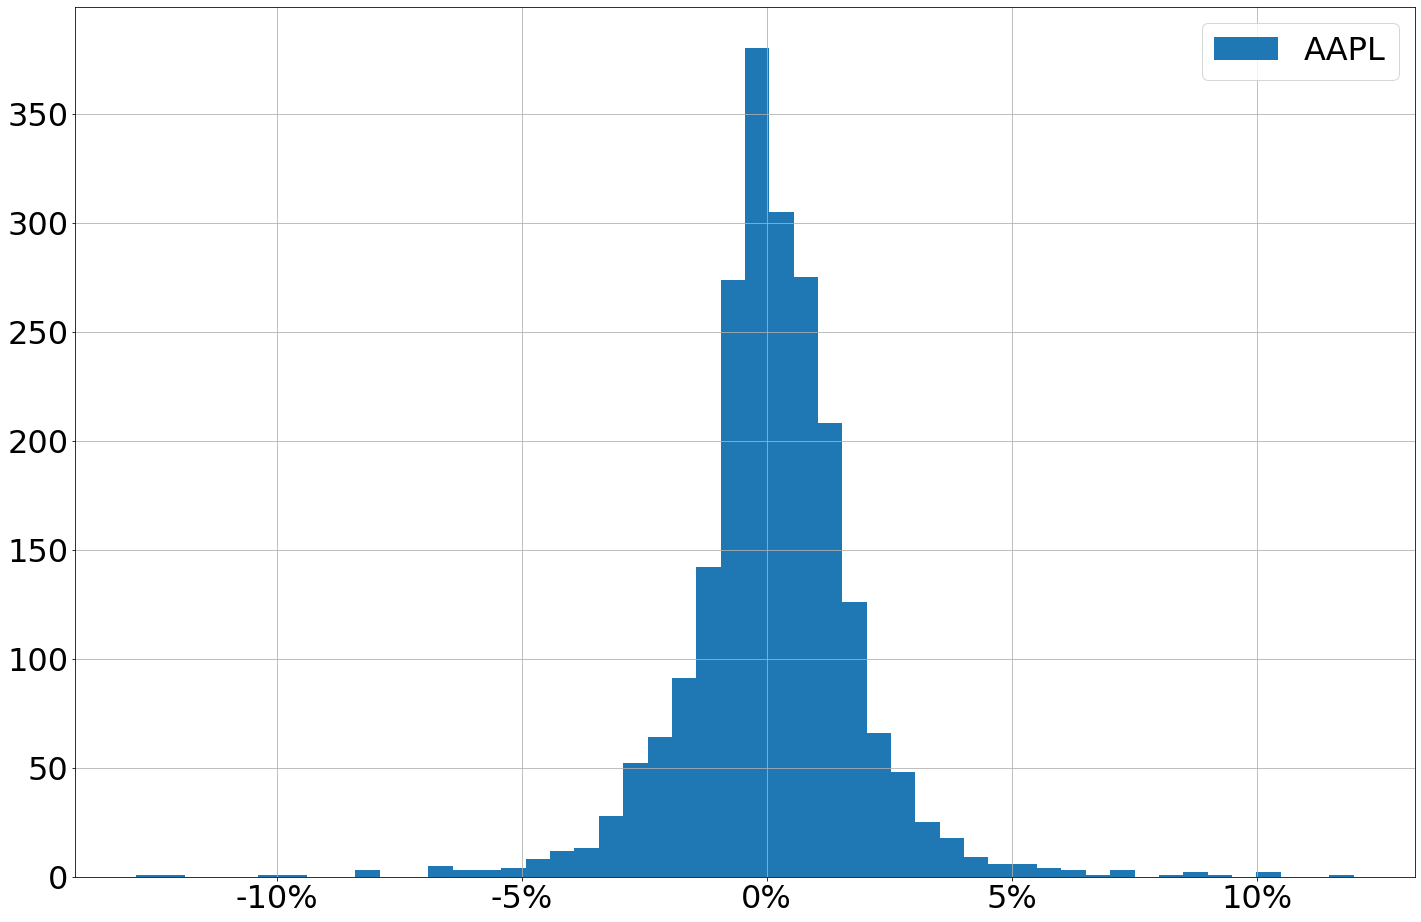

In [12]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

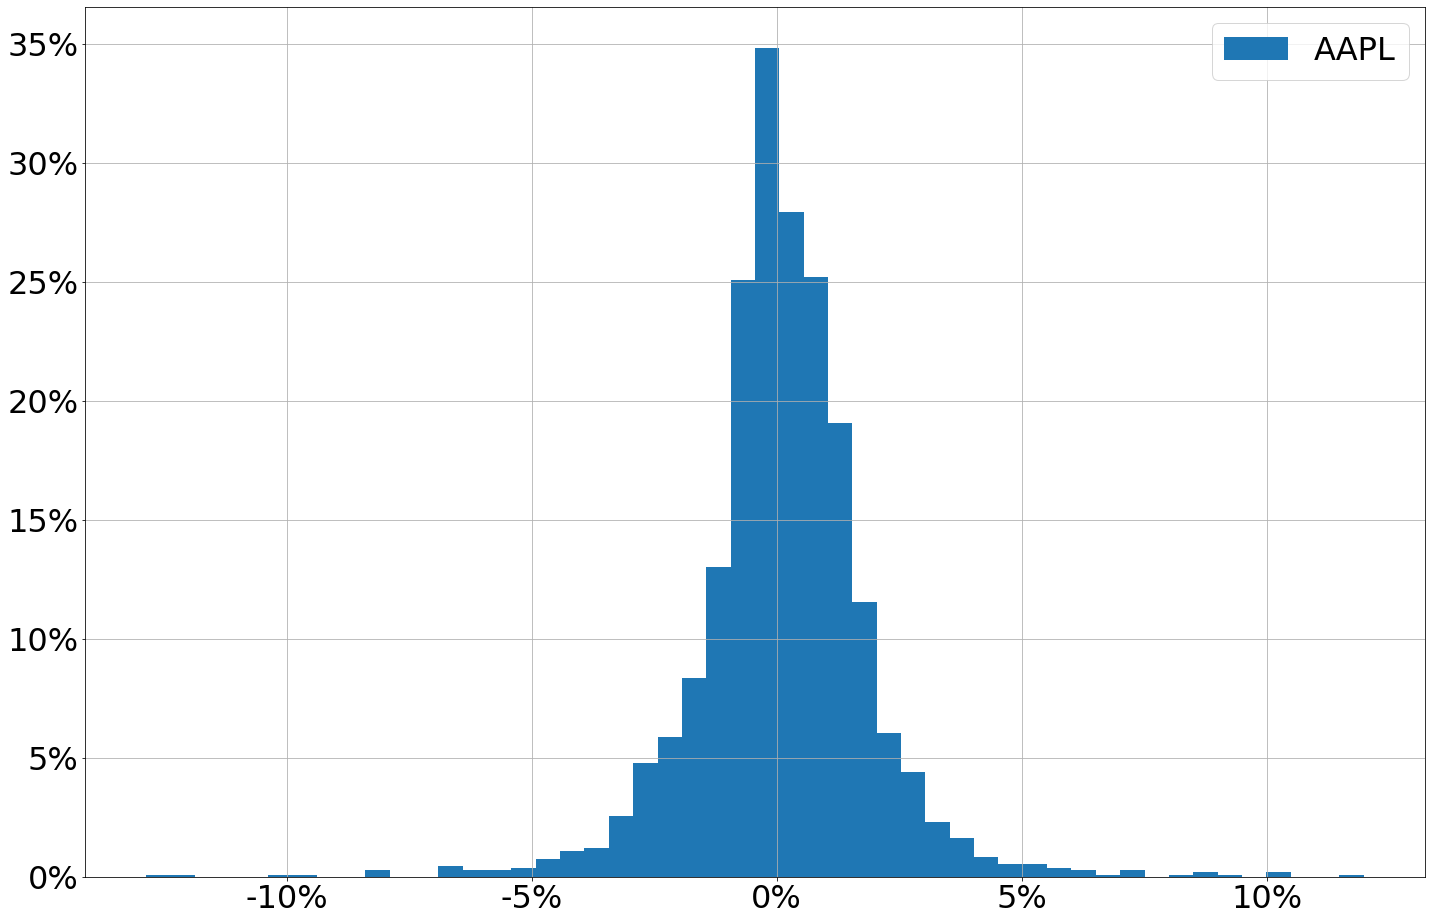

In [13]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000225A10A5D90>,
      dtype=object)

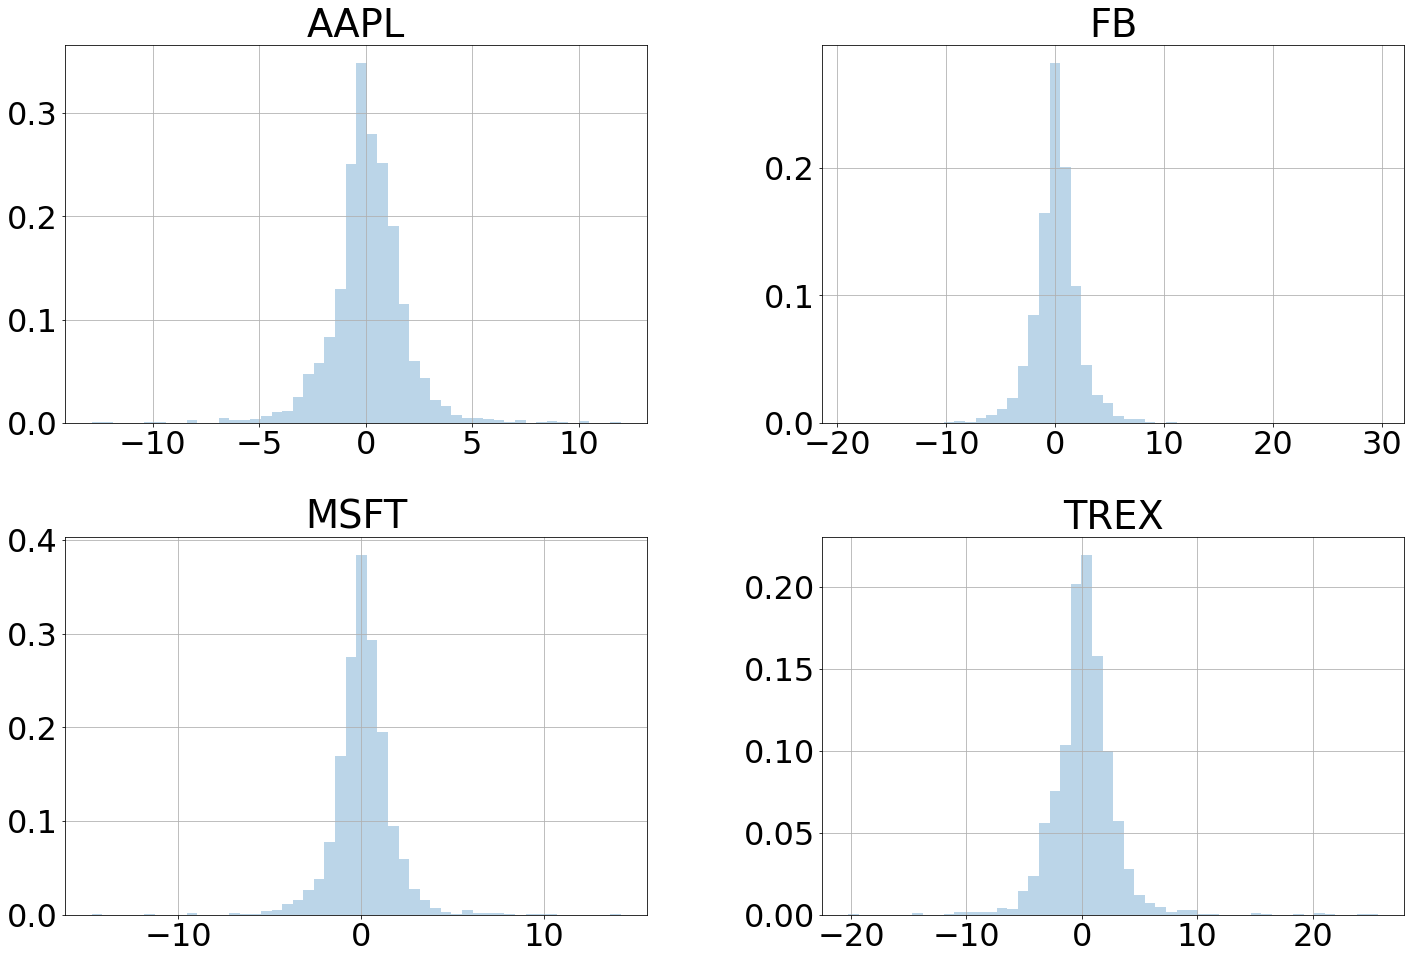

In [14]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

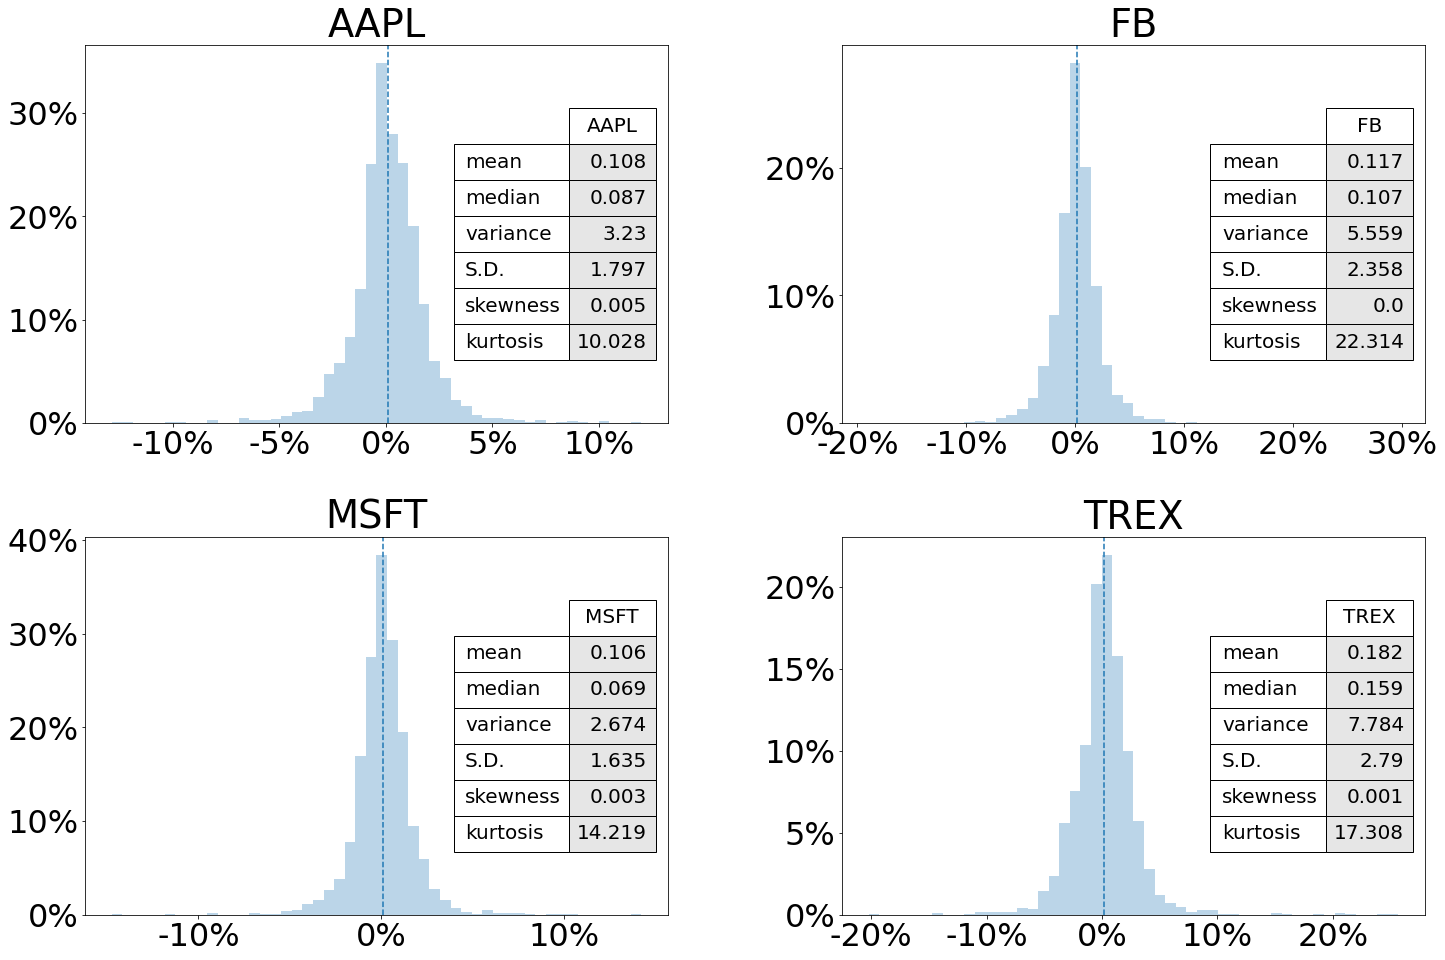

In [15]:
from pandas.plotting import table

# ax is a list of lists (2,2)
# a list of lists has a list for each element of the list
# thus ax == [[a1,a2], [a3,a4]]

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1],
                     # make cell grey
                     # this funcition is calling color in 
                     # terms of (r , g, b)
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn off grid lines
        a.grid(False)

   
plt.show()

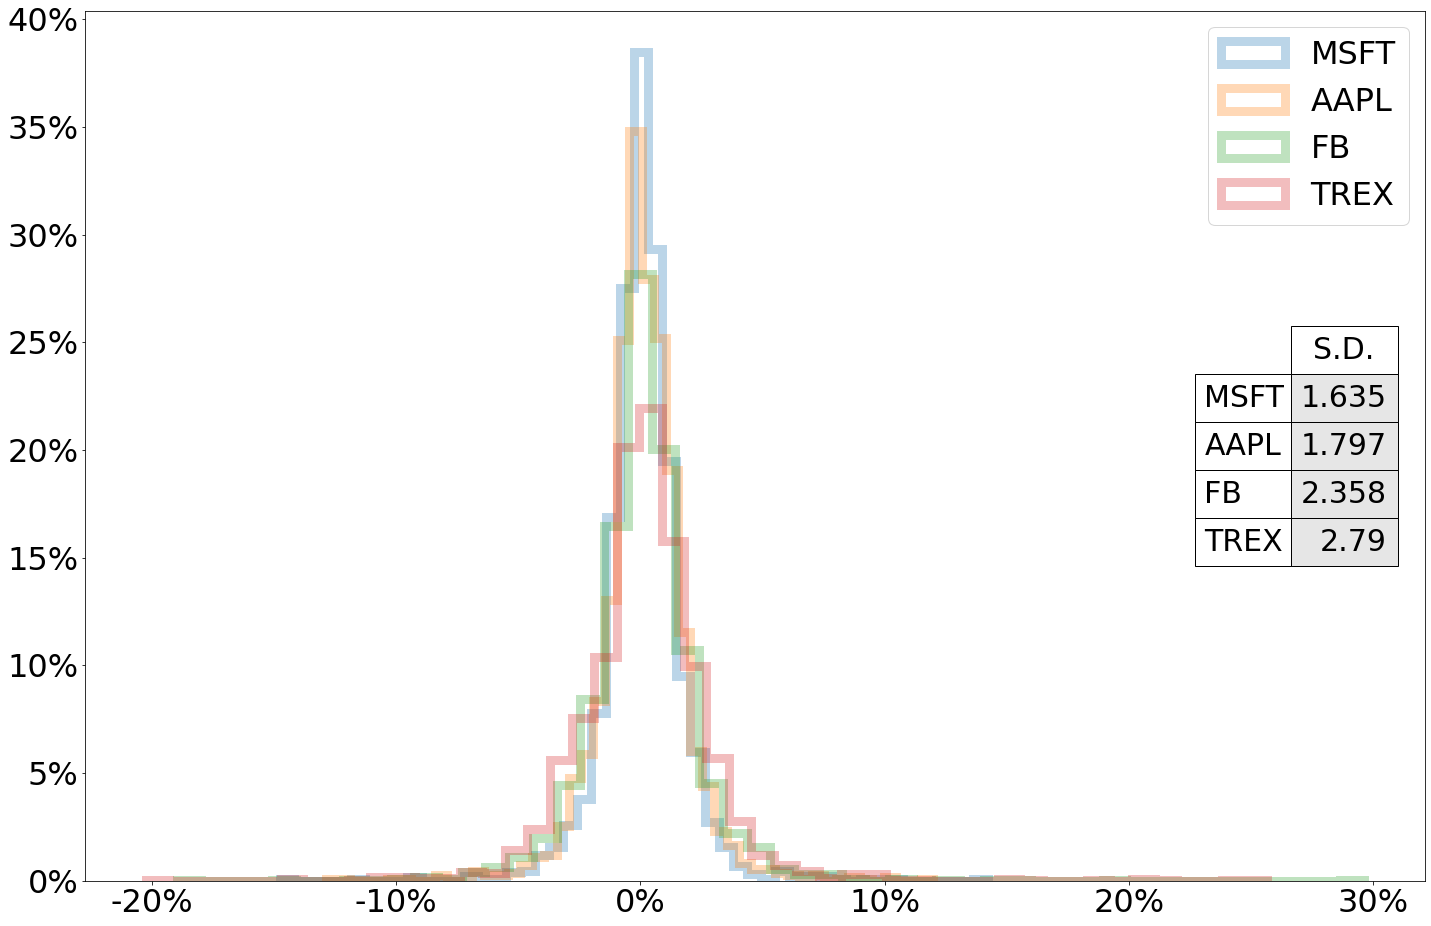

In [16]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 9, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
# stats scale (x, y) rescales dimension x and y in table
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

# legend draws from label values passed in df.hist()
plt.legend()

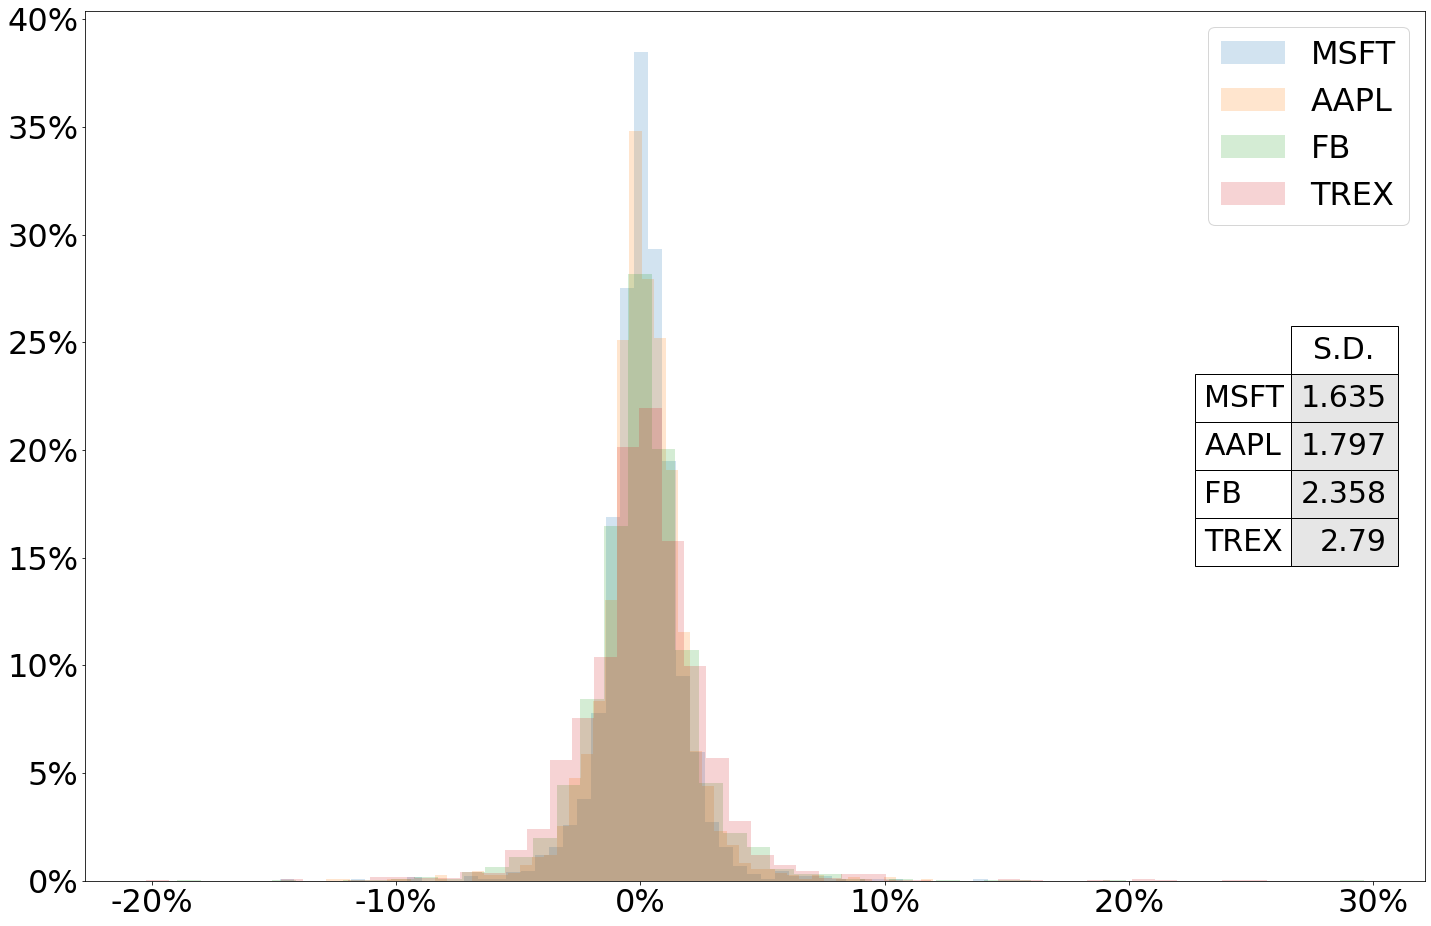

In [17]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
# stats scale (x, y) rescales dimension x and y in table
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

# legend draws from label values passed in df.hist()
plt.legend()

# Conclusion 

What did I learn
* How to produce summary statistics
* Transforming the data to measure daily percent change 
* Plotting observed and transformed data 
* Plotting the distribution of the data

These are all fundamental means of annallyzing data. 